<a href="https://colab.research.google.com/github/djibril6/AI-Notebook/blob/main/DogVSCat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Djibril ISSOUFOU

In this tutorial we will build a convolutional neural network for image binary classification from scratch. Our algorithm will be able to recognize cats or dogs. For more informations about this tutorial you can check this article: https://djib-ai.com/convolutional-neural-network-build-your-own-dog-and-cat-image-classification-system-from-scratch/

## Getting the data

We use the dogs vs cats dataset from this kaggle competition: https://www.kaggle.com/biaiscience/dogs-vs-cats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download  the dataset from [here](https://drive.google.com/file/d/1bvqNBfJlY5V595cUuavmSRHkADJU4lOm/view?usp=sharing) and move it to your drive. 
If the link is not active you can download the dataset from the [original source](https://www.kaggle.com/biaiscience/dogs-vs-cats) and then read our tutorial [here](https://djib-ai.com/convolutional-neural-network-build-your-own-dog-and-cat-image-classification-system-from-scratch/) to reorganize the data.

In [3]:
import os
import zipfile

In [4]:
# we unzip the file and move the content to /tmp/cats-vs-dogs
# note that zip_path is the path to the dataset you just put in your drive
zip_path = '/content/drive/MyDrive/blog/article 1/dataset/cats-vs-dogs.zip'
zip = zipfile.ZipFile(zip_path , "r")
zip.extractall("/tmp/cats-vs-dogs")
zip.close()

In [5]:
# We can see that the 2 train and validation folders each contain 2 folders: cat and dog
print("train directory:", os.listdir('/tmp/cats-vs-dogs/train'))
print("validation directory",os.listdir('/tmp/cats-vs-dogs/validation'))

train directory: ['dog', 'cat']
validation directory ['dog', 'cat']


## Data preprossessing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1/255)

train_data = data_generator.flow_from_directory(
    '/tmp/cats-vs-dogs/train/',
    target_size=(300, 300),
    batch_size=256,
    class_mode='binary'
)
validation_data = data_generator.flow_from_directory(
    '/tmp/cats-vs-dogs/validation/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 22000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


## Model building

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer=RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Training

In [9]:
history = model.fit(
    train_data,
    steps_per_epoch=86,
    epochs=15,
    verbose=1,
    validation_data=validation_data,
    validation_steps=24
)

Epoch 1/15
86/86 [==============================] - 161s 1s/step - loss: 0.6706 - accuracy: 0.5817 - val_loss: 0.6335 - val_accuracy: 0.6497
Epoch 2/15
86/86 [==============================] - 118s 1s/step - loss: 0.6171 - accuracy: 0.6623 - val_loss: 0.6173 - val_accuracy: 0.6627
Epoch 3/15
86/86 [==============================] - 117s 1s/step - loss: 0.5857 - accuracy: 0.6930 - val_loss: 0.5848 - val_accuracy: 0.6823
Epoch 4/15
86/86 [==============================] - 117s 1s/step - loss: 0.5479 - accuracy: 0.7233 - val_loss: 0.5787 - val_accuracy: 0.6820
Epoch 5/15
86/86 [==============================] - 117s 1s/step - loss: 0.5153 - accuracy: 0.7477 - val_loss: 0.4898 - val_accuracy: 0.7660
Epoch 6/15
86/86 [==============================] - 116s 1s/step - loss: 0.4921 - accuracy: 0.7656 - val_loss: 0.4736 - val_accuracy: 0.7743
Epoch 7/15
86/86 [==============================] - 117s 1s/step - loss: 0.4738 - accuracy: 0.7745 - val_loss: 0.4553 - val_accuracy: 0.7870
Epoch 8/15
86

## Model evaluation

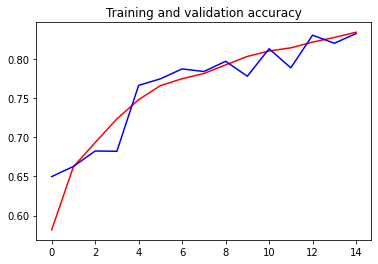

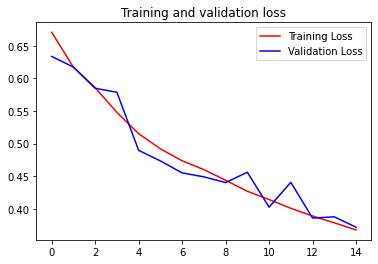

In [11]:
import matplotlib.pyplot as plt  
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
  
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing the model

In [15]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

allupload=files.upload()

for file_name in allupload.keys():
  path='/content/' + file_name
  img=image.load_img(path, target_size=(300, 300))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  if classes[0]>0:
    print(file_name + " is a dog")
    
  else:
    print(file_name + " is a cat")

Saving cat.jpg to cat.jpg
[[0.]]
cat.jpg is a cat
